# Student Performance Analysis and Predictor

In this notebook, we will start with analyzing how sleep, hours studied, hours studied, etc. will affect the final grade.
And then we will move on to the prediction of the final grade.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [43]:
df = pd.read_csv('Student_Performance.csv')

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


We just have the 'Extra Curricular' column as a categorical column. We will convert it to numerical using one-hot encoding.

In [44]:
df['Extracurricular Activities'] = np.where(df['Extracurricular Activities'].str.lower().str.strip() == 'yes', 1, 0)

df['Extracurricular Activities']

0       1
1       0
2       1
3       1
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    0
Name: Extracurricular Activities, Length: 10000, dtype: int32

Now, as the data is cleaned, and we don't have any null values; we can start with the analysis.

## Exploratory Data Analysis:

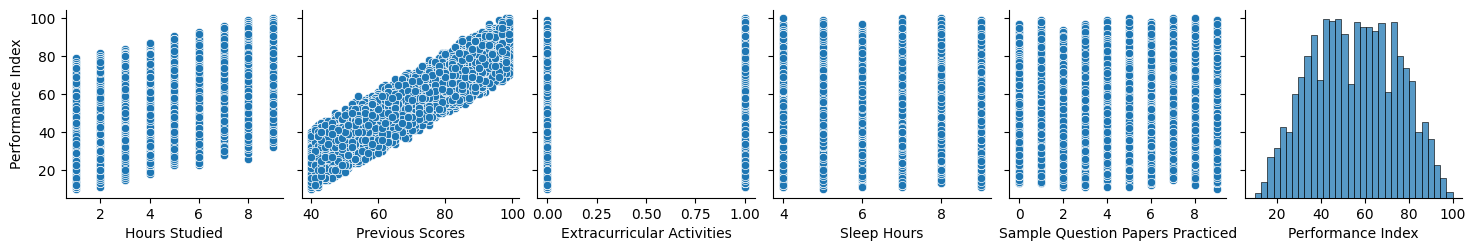

In [41]:
#We don't have a lot of varialbes to analyze, so we can use a pairplot to analyze the data.
# i want only the performance index on the y axis
sns.pairplot(df, y_vars=['Performance Index'])
plt.show()

We can see that the performance index is positively correlated with the number of hours studied and the the previous scores, whereas the other variables do not show a clear correlation with the performance index.
So we can just drop all the columns except the 'Hours Studied' and 'Previous Scores' columns.

In [57]:
#dropping the extra columns
df = df.drop(['Extracurricular Activities','Sleep Hours','Sample Question Papers Practiced'], axis=1)

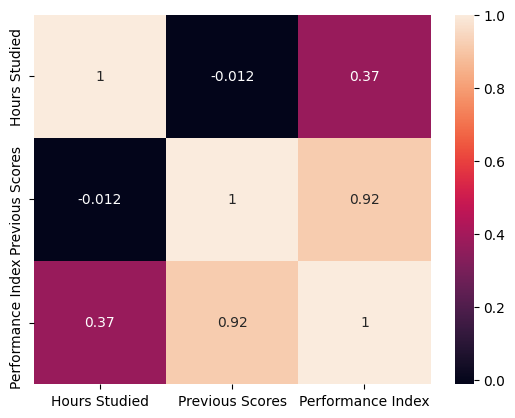

In [58]:
#now lets show the relationship between the performance index with previours scores and hours studied with a correlation heatmap
sns.heatmap(df.corr(), annot=True)
plt.show()

We can see that previous scores have a very high correlation with the performance index, while hours studied have a moderate correlation with the performance index.

After we have the variables we need to analyze, we can see that a linear regression model will be a good fit for this data.

## Linear Regression Model:

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [101]:
#split the data into training and testing data
X = df.drop(['Performance Index'], axis=1)
y = df['Performance Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [102]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [103]:
#training the model
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.9863371638870497

In [104]:
#rmse of the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

2.2709951348618125

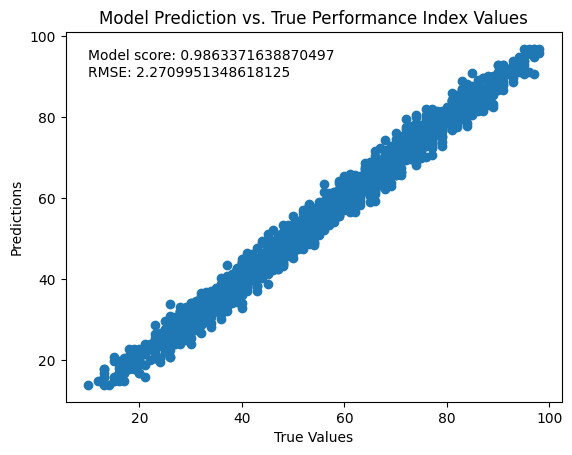

In [105]:
# Plotting the model
plt.scatter(y_test, y_pred)
plt.title('Model Prediction vs. True Performance Index Values')
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Add text to the plot
plt.text(10, 90, f"Model score: {model.score(X_test, y_test)}\nRMSE: {rmse}")

plt.show()
